**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric = 'euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.X_train = X
            self.y_train = y
        elif self.algorithm == 'kd_tree':
            self.X_train = sklearn.neighbors.KDTree(X, leaf_size=2, metric = self.metric)
            self.y_train = y
    
    def predict(self, X):
        if self.algorithm == 'brute':
            indexes = np.argpartition(scipy.spatial.distance.cdist(X, self.X_train, self.metric), self.n_neighbors, axis=1)[:, :self.n_neighbors] 
        elif self.algorithm == 'kd_tree':
            indexes = self.X_train.query(X, self.n_neighbors, False)
        result = np.array([])
        for i in self.y_train[indexes]:
            result = np.append(result, np.argmax(np.bincount(i)))
        return result.astype(dtype = int)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 506 µs, sys: 164 µs, total: 670 µs
Wall time: 700 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 9.78 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 4.04 ms, sys: 0 ns, total: 4.04 ms
Wall time: 5.65 ms


array([2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 761 µs, sys: 244 µs, total: 1 ms
Wall time: 948 µs


array([2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 1.26 ms, sys: 0 ns, total: 1.26 ms
Wall time: 1.18 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 582 µs, sys: 0 ns, total: 582 µs
Wall time: 578 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 3.02 ms, total: 3.02 ms
Wall time: 4.98 ms


array([1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 864 µs, sys: 276 µs, total: 1.14 ms
Wall time: 921 µs


array([1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
X = sklearn.feature_extraction.text.CountVectorizer(max_features = 1000).fit_transform(raw_documents = data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn.model_selection import KFold

In [23]:
kf = KFold(n_splits = 3)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

MyKNeighborsClassifier with 1 neighbours, average is 0.18260631942212335
MyKNeighborsClassifier with 2 neighbours, average is 0.169790026564096
MyKNeighborsClassifier with 3 neighbours, average is 0.17288303914480463
MyKNeighborsClassifier with 4 neighbours, average is 0.17403213619144597
MyKNeighborsClassifier with 5 neighbours, average is 0.17350224157701435
MyKNeighborsClassifier with 6 neighbours, average is 0.17456301504317662
MyKNeighborsClassifier with 7 neighbours, average is 0.1776566603478632
MyKNeighborsClassifier with 8 neighbours, average is 0.1819874685032347
MyKNeighborsClassifier with 9 neighbours, average is 0.18410885139600938
MyKNeighborsClassifier with 10 neighbours, average is 0.18419703437116
optimal neighbour is 10


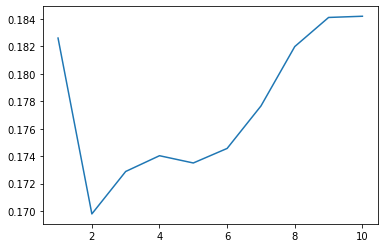

In [24]:
array = np.array([])
for i in range(1, 11):
    accuracy = 0
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf.fit(X_train.toarray(),y_train)
        my_clf_pred = my_clf.predict(X_test.toarray())
        accuracy += accuracy_score(y_test, my_clf_pred)
    print('MyKNeighborsClassifier with',i,'neighbours, average is',accuracy/3)
    array = np.append(array,accuracy/3)
print('optimal neighbour is',np.array([1,2,3,4,5,6,7,8,9,10])[np.argmax(array)])
plt.plot(np.arange(1,11), array)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Попробуем использовать косинусную метрику:

MyKNeighborsClassifier with 1 neighbours, average is 0.24783395148122558
MyKNeighborsClassifier with 2 neighbours, average is 0.24040968549493877
MyKNeighborsClassifier with 3 neighbours, average is 0.2399674583027868
MyKNeighborsClassifier with 4 neighbours, average is 0.23837641527465048
MyKNeighborsClassifier with 5 neighbours, average is 0.2413816666961938
MyKNeighborsClassifier with 6 neighbours, average is 0.24288438614385108
MyKNeighborsClassifier with 7 neighbours, average is 0.24465226380671679
MyKNeighborsClassifier with 8 neighbours, average is 0.24562452621862874
MyKNeighborsClassifier with 9 neighbours, average is 0.24509458473575432
MyKNeighborsClassifier with 10 neighbours, average is 0.24208956765642506
optimal neighbour is 1


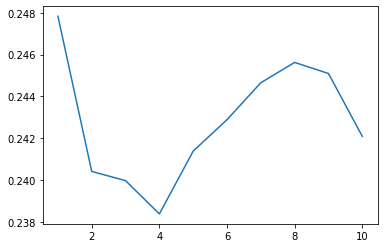

In [25]:
array = np.array([])
for i in range(1, 11):
    accuracy = 0
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric = 'cosine')
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf.fit(X_train.toarray(),y_train)
        my_clf_pred = my_clf.predict(X_test.toarray())
        accuracy += accuracy_score(y_test, my_clf_pred)
    print('MyKNeighborsClassifier with',i,'neighbours, average is',accuracy/3)
    array = np.append(array,accuracy/3)
print('optimal neighbour is',np.array([1,2,3,4,5,6,7,8,9,10])[np.argmax(array)])
plt.plot(np.arange(1,11), array)

Как видно по результатам, средняя точность косинусной метрики примерно на 0.06. Оптимальное количество соседей в этом случае 1. Посмотрим на результаты при TfdifVectorizer:

MyKNeighborsClassifier with 1 neighbours, average is 0.27169809711310083
MyKNeighborsClassifier with 2 neighbours, average is 0.21124260990110852
MyKNeighborsClassifier with 3 neighbours, average is 0.22016957190083128
MyKNeighborsClassifier with 4 neighbours, average is 0.21522012373456376
MyKNeighborsClassifier with 5 neighbours, average is 0.21265658395230144
MyKNeighborsClassifier with 6 neighbours, average is 0.20956282147650782
MyKNeighborsClassifier with 7 neighbours, average is 0.2083254711520516
MyKNeighborsClassifier with 8 neighbours, average is 0.20470202496981904
MyKNeighborsClassifier with 9 neighbours, average is 0.2027574767117738
MyKNeighborsClassifier with 10 neighbours, average is 0.20028270576019724
optimal neighbour is 1


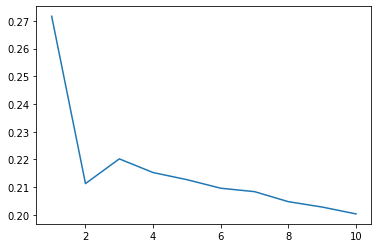

In [26]:
X = sklearn.feature_extraction.text.TfidfVectorizer(max_features = 1000).fit_transform(raw_documents = data)
array = np.array([])
for i in range(1, 11): #Tfdif + euclid
    accuracy = 0
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf.fit(X_train.toarray(),y_train)
        my_clf_pred = my_clf.predict(X_test.toarray())
        accuracy += accuracy_score(y_test, my_clf_pred)
    print('MyKNeighborsClassifier with',i,'neighbours, average is',accuracy/3)
    array = np.append(array,accuracy/3)
print('optimal neighbour is',np.array([1,2,3,4,5,6,7,8,9,10])[np.argmax(array)])
plt.plot(np.arange(1,11), array)

MyKNeighborsClassifier with 1 neighbours, average is 0.4038358445913677
MyKNeighborsClassifier with 2 neighbours, average is 0.38774949360990957
MyKNeighborsClassifier with 3 neighbours, average is 0.3962342752859233
MyKNeighborsClassifier with 4 neighbours, average is 0.40233338292014587
MyKNeighborsClassifier with 5 neighbours, average is 0.4110837211931318
MyKNeighborsClassifier with 6 neighbours, average is 0.41400015691554654
MyKNeighborsClassifier with 7 neighbours, average is 0.4179774364067878
MyKNeighborsClassifier with 8 neighbours, average is 0.42301525502197707
MyKNeighborsClassifier with 9 neighbours, average is 0.4251367785200802
MyKNeighborsClassifier with 10 neighbours, average is 0.42443009613936206
optimal neighbour is 9


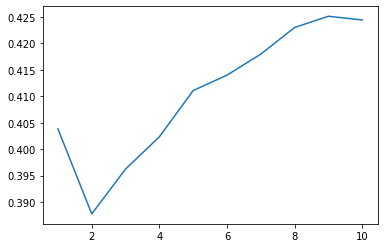

In [29]:
array = np.array([])
for i in range(1, 11): #Tfdif + cosine
    accuracy = 0
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metric = 'cosine')
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf.fit(X_train.toarray(),y_train)
        my_clf_pred = my_clf.predict(X_test.toarray())
        accuracy += accuracy_score(y_test, my_clf_pred)
    print('MyKNeighborsClassifier with',i,'neighbours, average is',accuracy/3)
    array = np.append(array,accuracy/3)
print('optimal neighbour is',np.array([1,2,3,4,5,6,7,8,9,10])[np.argmax(array)])
plt.plot(np.arange(1,11), array)

Как видно из результатов, максимальная точность достигается при TfdifVectorizer и косинусной метрике. Tfdif дает большую точность, чем Vectorizer. Лучшая модель в нашем случае - Tfdif + cosine с 9 соседями.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [34]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [40]:
newdata = newsgroups['data']
newtarget = newsgroups['target']

In [50]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_features = 1000)
X = vectorizer.fit_transform(data)
my_clf = MyKNeighborsClassifier(n_neighbors=9, algorithm='brute', metric = 'cosine')
my_clf.fit(X.toarray(), target)

newvectorizer = sklearn.feature_extraction.text.TfidfVectorizer(vocabulary = vectorizer.get_feature_names())
newX = newvectorizer.fit_transform(newdata)


In [52]:
accuracy_score(newtarget, my_clf.predict(newX.toarray()))

0.36975570897503984